### Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Reading Data

In [89]:
df =pd.read_csv("annotated_points_np_201.csv")

In [90]:
data=np.array(df)

### Changing labels

In [91]:
data[data == 2.0] = -1

In [92]:
data

array([[ 3.81048387, 27.4512987 ,  1.        ],
       [ 6.35080645, 27.61363636,  1.        ],
       [ 7.56048387, 24.61038961,  1.        ],
       [ 8.52822581, 20.55194805,  1.        ],
       [ 8.22580645, 13.81493506,  1.        ],
       [ 8.58870968,  8.7012987 ,  1.        ],
       [ 6.59274194,  6.02272727,  1.        ],
       [ 4.35483871, 13.16558442,  1.        ],
       [ 5.14112903, 19.65909091,  1.        ],
       [ 4.71774194, 23.06818182,  1.        ],
       [ 2.35887097, 23.87987013,  1.        ],
       [ 1.51209677, 17.30519481,  1.        ],
       [ 1.93548387,  8.29545455,  1.        ],
       [ 3.81048387,  2.69480519,  1.        ],
       [ 8.83064516,  2.37012987,  1.        ],
       [12.82258065,  9.18831169,  1.        ],
       [13.18548387, 17.62987013,  1.        ],
       [11.73387097, 25.25974026,  1.        ],
       [ 9.85887097, 27.4512987 ,  1.        ],
       [ 6.29032258, 25.01623377,  1.        ],
       [12.09677419, 18.27922078,  1.   

### Data and Label division

In [93]:
coord_data=data[:,0:2]
y=data[:,2]

In [94]:
coord_data.shape

(200, 2)

In [95]:
y.shape

(200,)

### Algorithm implementation

##### variable shapes

In [96]:
print(y.shape)
print(coord_data.shape)
print(data.shape)

(200,)
(200, 2)
(200, 3)


##### Perceptron

In [97]:
def perceptron(D,iter,y,W,W0):
    
    for t in range(iter):
        changed=False
        for i in range(D.shape[0]):
            if y[i]*(np.dot(W,D[i])+W0)<=0:
                W=W+y[i]*D[i]
                W0=W0+y[i]
                changed=True
        if not changed:
            break
    return W0,W

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line(X,coefficients):
    # Extract coefficients for x, y, and the constant term
    a, b, c = coefficients

    # Generate x values
    x_values = np.linspace(min(X), max(X), 100)

    # Calculate corresponding y values using the equation of the line
    y_values = -( b * x_values + a) /c
    plt.scatter(coord_data[:, 0], coord_data[:, 1], c=y, cmap='viridis')
    # Plot the line
    plt.plot(x_values, y_values, label=f'{a}x + {b}y + {c} = 0')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of the Line')

    # Add a grid for better readability
    plt.grid(True)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage with your coefficients



##### Weight Initialization with 0 s

In [99]:
W=np.array([0]*coord_data.shape[1])
W0=0

In [100]:
W0,W=perceptron(coord_data,10000,y,W,W0)

In [101]:
W= np.insert(W,0, W0)
W

array([538.        , -59.09274194,  25.86038961])

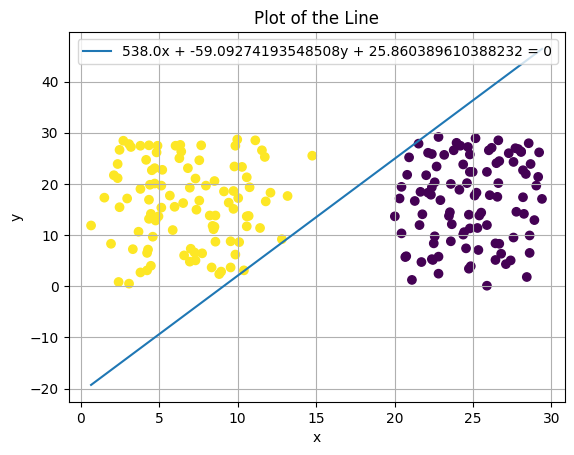

In [102]:
coefficients = W
plot_line(coord_data[:,0],coefficients)

### Ramdom weight initialization

In [103]:
W=np.array([4,8])
W0=10

In [104]:
W0,W=perceptron(coord_data,10000,y,W,W0)

In [105]:
W= np.insert(W,0, W0)
W

array([530.        , -58.66129032,  26.01948052])

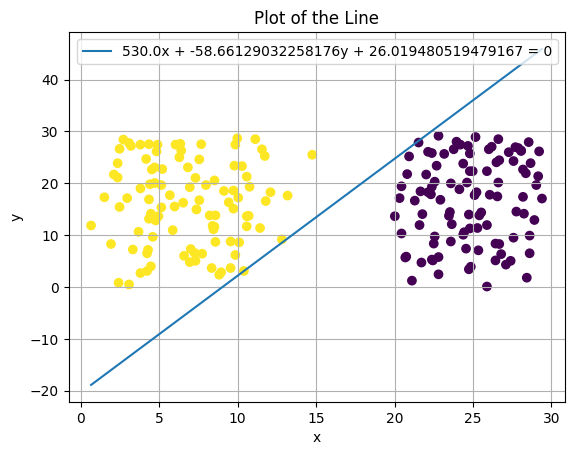

In [106]:
coefficients = W
plot_line(coord_data[:,0],coefficients)

### For Random Generated data

##### Class 1

In [188]:
upper_limit = 15

# Generate a 100x2 matrix of random floating-point values
random_matrix1 = np.random.uniform(low=0, high=upper_limit, size=(100, 2))

# print(random_matrix)

##### Class 2

In [189]:
# Set the lower and upper limits for the random values
lower_limit = 20
upper_limit = 30

# Generate a 100x2 matrix of random floating-point values
random_matrix2 = np.random.uniform(low=lower_limit, high=upper_limit, size=(100, 2))

# print(random_matrix)

##### coordinate data

In [190]:
coord_data2=np.concatenate((random_matrix1,random_matrix2),axis=0)

##### extranting x for graph

In [191]:
coord_data2[:,0]

array([ 3.41830131, 14.97888197,  5.16829318, 11.49790052, 10.41208986,
        3.49424797,  4.2828108 ,  3.11512015,  4.54328555,  0.6334433 ,
       12.6083226 ,  5.6640987 , 12.40503672,  0.71629911,  1.40222013,
       14.34994023, 12.49247346,  9.34662141,  1.76580533,  4.18886254,
        9.79823506,  4.95851241,  9.70568001,  0.25259306,  0.58186086,
        0.14712556,  3.82372358,  5.23708756, 12.09931843,  8.88553187,
        3.22756126,  9.05541463, 10.96519459,  0.48635071,  7.58262114,
        7.39270233,  0.66664038,  0.63859796, 10.285714  ,  5.55109637,
        9.58043428,  3.10481992,  7.32106855,  7.64233959,  2.14647979,
        7.98044814,  5.438578  , 12.51144857,  9.40862141, 12.46139775,
        6.91309112,  6.29828709,  7.56060561,  5.39826362,  7.29556376,
       12.25672066,  5.19949675,  3.53112323,  7.63008152, 13.10027711,
        9.24536415, 14.33131686,  5.48390643,  8.56825542,  0.89301943,
        3.09224324,  0.81288379, 12.6542804 ,  8.85339891, 13.84

##### making labels

In [192]:
label=np.concatenate((np.ones(100),(-1)*np.ones(100)))
label

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

##### training in perceptron

In [193]:
W=np.array([0,0])
W0=0

In [194]:
W2_0,W2=perceptron(coord_data2,10000,label,W,W0)

In [195]:
W2= np.insert(W2,0, W2_0)
W2

array([330.        , -24.06506513,   4.93755238])

##### Plotting

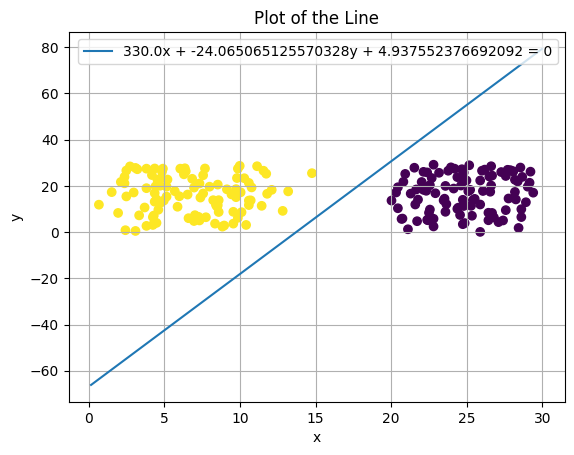

In [196]:
plot_line(coord_data2[:,0],W2)